## Linear Regression between MANAGEMENT FEE and MONTHLY YIELD of Israeli pension funds

### What is Linear Regression?
The term “linearity” in algebra refers to a linear relationship between two or more variables. If we draw this relationship in a two-dimensional space (between two variables), we get a straight line.
Linear regression performs the task to predict a dependent variable value (y) based on a given independent variable (x). So, this regression technique finds out a linear relationship between x (input) and y(output). Hence, the name is Linear Regression. If we plot the independent variable (x) on the x-axis and dependent variable (y) on the y-axis, linear regression gives us a straight line that best fits the data points, as shown in the figure below.
We know that the equation of a straight line is basically:

![Image of Linear Regression](https://pythonprogramming.net/static/images/machine-learning/linear-regression-algorithm-tutorial-test.png)
[source](https://pythonprogramming.net/regression-introduction-machine-learning-tutorial/)

The equation of the above line is : 
$$ Y= mx + b $$
Where *b* is the **intercept** and *m* is the **slope** of the line. So basically, the linear regression algorithm gives us the most optimal value for the intercept and the slope (in two dimensions). The y and x variables remain the same, since they are the data features and cannot be changed. The values that we can control are the intercept(b) and slope(m). There can be multiple straight lines depending upon the values of intercept and slope. Basically what the linear regression algorithm does is it fits multiple lines on the data points and returns the line that results in the least error.

In [1]:
import pandas as pd  
import numpy as np  
import matplotlib.pyplot as plt  
import seaborn as seabornInstance 
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics
%matplotlib inline

In [56]:
dataset = pd.read_csv("final_pensianet_investment.csv")

In [57]:
dataset.shape

(7633, 6)

In [58]:
dataset.describe()

,REPORT_PERIOD,MONTHLY_YIELD,AVG_ANNUAL_MANAGEMENT_FEE,TOTAL_ASSETS
count,7626.000000,7633.000000,7633.000000,7633.000000
mean,201710.237346,1.051784,0.373825,1653.494825
std,125.917392,2.346580,0.213408,7837.544321
min,201501.000000,-7.810000,0.050000,-512.900000
25%,201607.000000,-0.030000,0.230000,5.840000
50%,201707.000000,0.480000,0.270000,65.970000
75%,201807.000000,1.190000,0.510000,404.180000
max,201912.000000,16.840000,4.300000,81727.970000


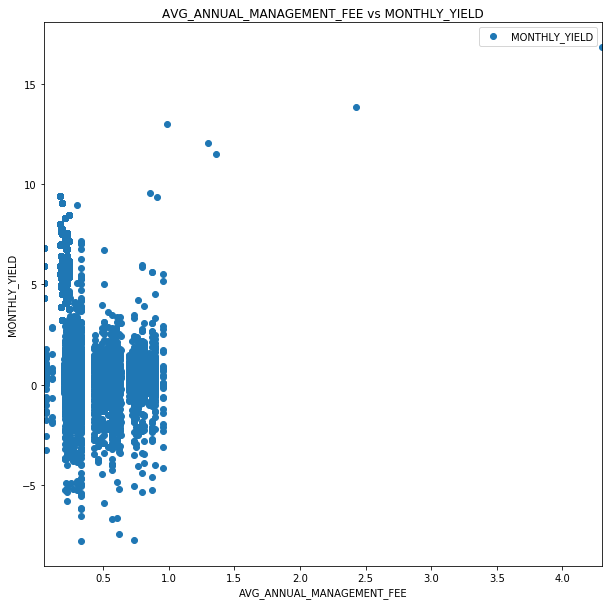

In [59]:
dataset.plot(x='AVG_ANNUAL_MANAGEMENT_FEE', y='MONTHLY_YIELD', style='o',figsize=(10,10))  
plt.title('AVG_ANNUAL_MANAGEMENT_FEE vs MONTHLY_YIELD')  
plt.xlabel('AVG_ANNUAL_MANAGEMENT_FEE')  
plt.ylabel('MONTHLY_YIELD')  
plt.show()

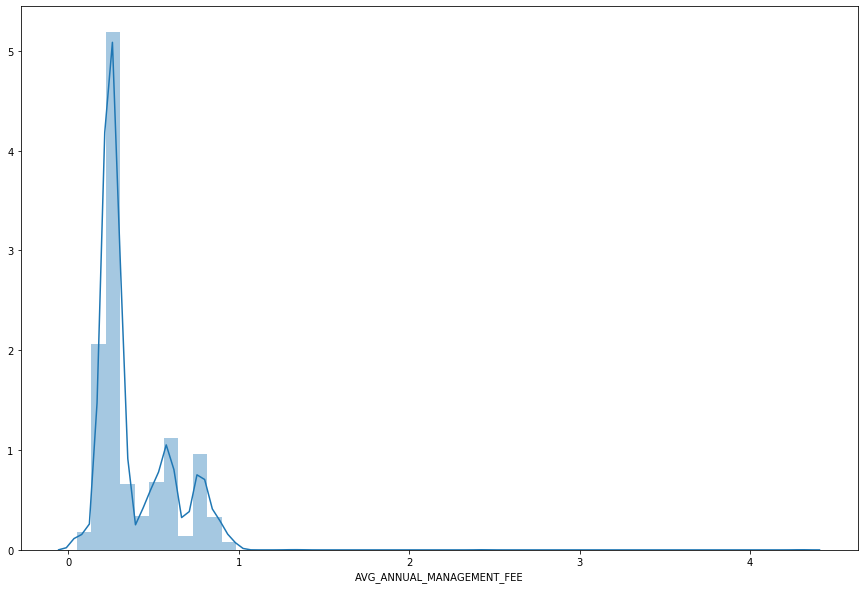

In [60]:
plt.figure(figsize=(15,10))
plt.tight_layout()
seabornInstance.distplot(dataset['AVG_ANNUAL_MANAGEMENT_FEE'])

In [61]:
X = dataset['AVG_ANNUAL_MANAGEMENT_FEE'].values.reshape(-1,1)
y = dataset['MONTHLY_YIELD'].values.reshape(-1,1)

In [62]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [63]:
dataset.isnull().sum()

FUND_NAME                    0
FUND_CLASSIFICATION          0
REPORT_PERIOD                7
MONTHLY_YIELD                0
AVG_ANNUAL_MANAGEMENT_FEE    0
TOTAL_ASSETS                 0
dtype: int64

In [64]:
regressor = LinearRegression()  
regressor.fit(X_train, y_train) #training the algorithm

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [65]:
#To retrieve the intercept:
print(regressor.intercept_)
#For retrieving the slope:
print(regressor.coef_)

[2.05406852]
[[-2.6810659]]


In [66]:
y_pred = regressor.predict(X_test)

In [67]:
df = pd.DataFrame({'Actual MONTHLY_YIELD': y_test.flatten(), 'Predicted MONTHLY_YIELD': y_pred.flatten()})
df

,Actual MONTHLY_YIELD,Predicted MONTHLY_YIELD
0,4.54,1.544666
1,1.39,1.222938
2,-0.12,1.222938
3,0.05,1.491045
4,0.77,1.169317
...,...,...
1522,0.07,1.437423
1523,3.10,1.464234
1524,-5.79,1.437423
1525,-0.22,0.123701


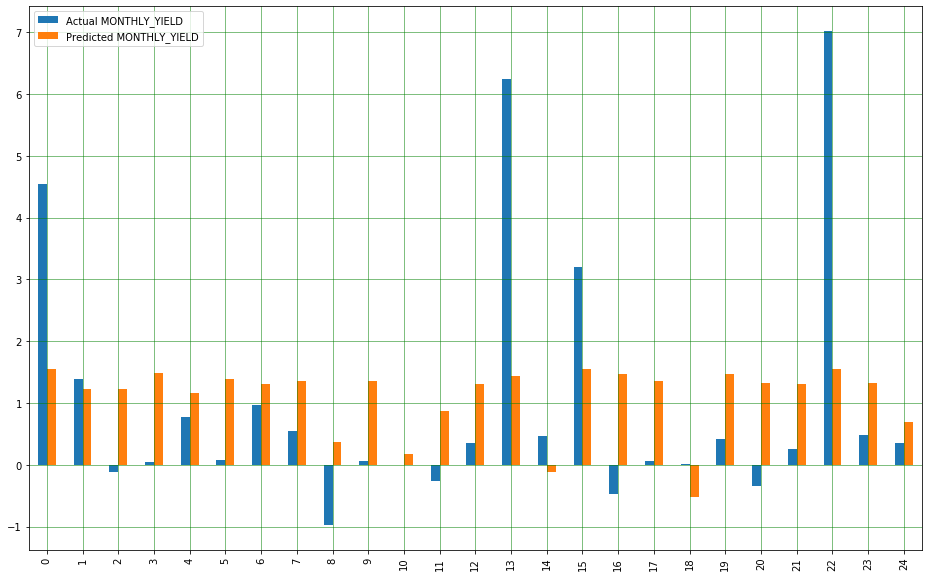

In [68]:
df1 = df.head(25)
df1.plot(kind='bar',figsize=(16,10))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

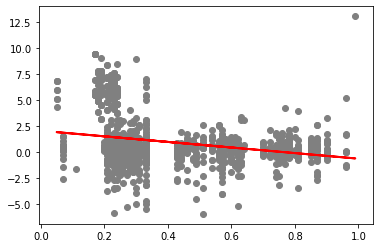

In [69]:
plt.scatter(X_test, y_test,  color='gray')
plt.plot(X_test, y_pred, color='red', linewidth=2)
plt.show()

In [71]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 1.631326550566289
Mean Squared Error: 5.212844358925479
Root Mean Squared Error: 2.2831654252211946
